# Environment setup & graphical parameters

In [1]:
# Import packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

from scipy import stats
from scipy.stats import shapiro

import statsmodels.api as sm

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
                                  
# Graphical set up

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)

sns.set()
sns.set_style("ticks")
ColorsPalette = sns.color_palette("tab10")

# Read datasets an encoding variable

In [2]:
# Read the data
df_origin = pd.read_csv('clean_dataset.csv', sep = ',', encoding = 'UTF-8', decimal = ".", low_memory=False)
#df_origin_imputed = pd.read_csv('clean_dataset_imputed.csv', sep = ',', encoding = 'UTF-8', decimal = ".", low_memory=False)

In [3]:
# Copy the original table to avoid charging it
df = df_origin.copy()
#df_imputed = df_origin_imputed.copy()

In [4]:
df.head()

,code,creator,product_name,brands,categories,countries,additives_n,ingredients_from_palm_oil_n,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,created_years,last_modified_years
0,0000000000017,Kiliweb,Vitória crackers,unknown,unknown,France,NaN,NaN,NaN,NaN,NaN,unknown,unknown,375.0,7.0,3.08,70.1,15.0,7.8,1.40,2018,2019
1,0000000000123,Kiliweb,Sauce sweety chili 0%,unknown,unknown,France,NaN,NaN,NaN,NaN,NaN,unknown,unknown,21.0,0.0,0.00,4.8,0.4,0.2,2.04,2018,2018
2,0000000000178,Kiliweb,Mini coco,unknown,unknown,France,NaN,NaN,NaN,NaN,NaN,unknown,unknown,60.0,3.0,1.00,10.0,3.0,2.0,1.15,2018,2018
3,000000000080,Kiliweb,Pur jus de pomme,unknown,unknown,En:fr,NaN,NaN,NaN,NaN,NaN,unknown,unknown,63.0,0.0,0.00,15.5,15.5,0.2,0.00,2021,2021
4,0000000000949,Kiliweb,Salade de carottes râpées,unknown,"Plats préparés, légumes préparés, carottes râp...",France,NaN,NaN,1.0,b,NaN,Composite foods,One-dish meals,32.0,0.3,0.10,5.3,3.9,0.9,0.42,2018,2019


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585113 entries, 0 to 585112
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   code                         585113 non-null  object 
 1   creator                      585113 non-null  object 
 2   product_name                 585113 non-null  object 
 3   brands                       585113 non-null  object 
 4   categories                   585113 non-null  object 
 5   countries                    585113 non-null  object 
 6   additives_n                  201849 non-null  float64
 7   ingredients_from_palm_oil_n  201849 non-null  float64
 8   nutriscore_score             280279 non-null  float64
 9   nutriscore_grade             280279 non-null  object 
 10  nova_group                   169905 non-null  object 
 11  pnns_groups_1                585113 non-null  object 
 12  pnns_groups_2                585113 non-null  object 
 13 

In [20]:
# Encode categorical data
categorical_cols = ['nutriscore_grade',
                   'nova_group',
                   'pnns_groups_1',
                   'pnns_groups_2',
                   'created_years',
                   'last_modified_years']
        
for col in categorical_cols:
        df.loc[:,col] = df.loc[:,col].astype("object")

# 1. Univariate analysis

## 1.1 Continous variable

In [21]:
# List of continous varibale 
df_numeric = df.select_dtypes('float')
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['additives_n' 'ingredients_from_palm_oil_n' 'nutriscore_score'
 'energy-kcal_100g' 'fat_100g' 'saturated-fat_100g' 'carbohydrates_100g'
 'sugars_100g' 'proteins_100g' 'salt_100g']


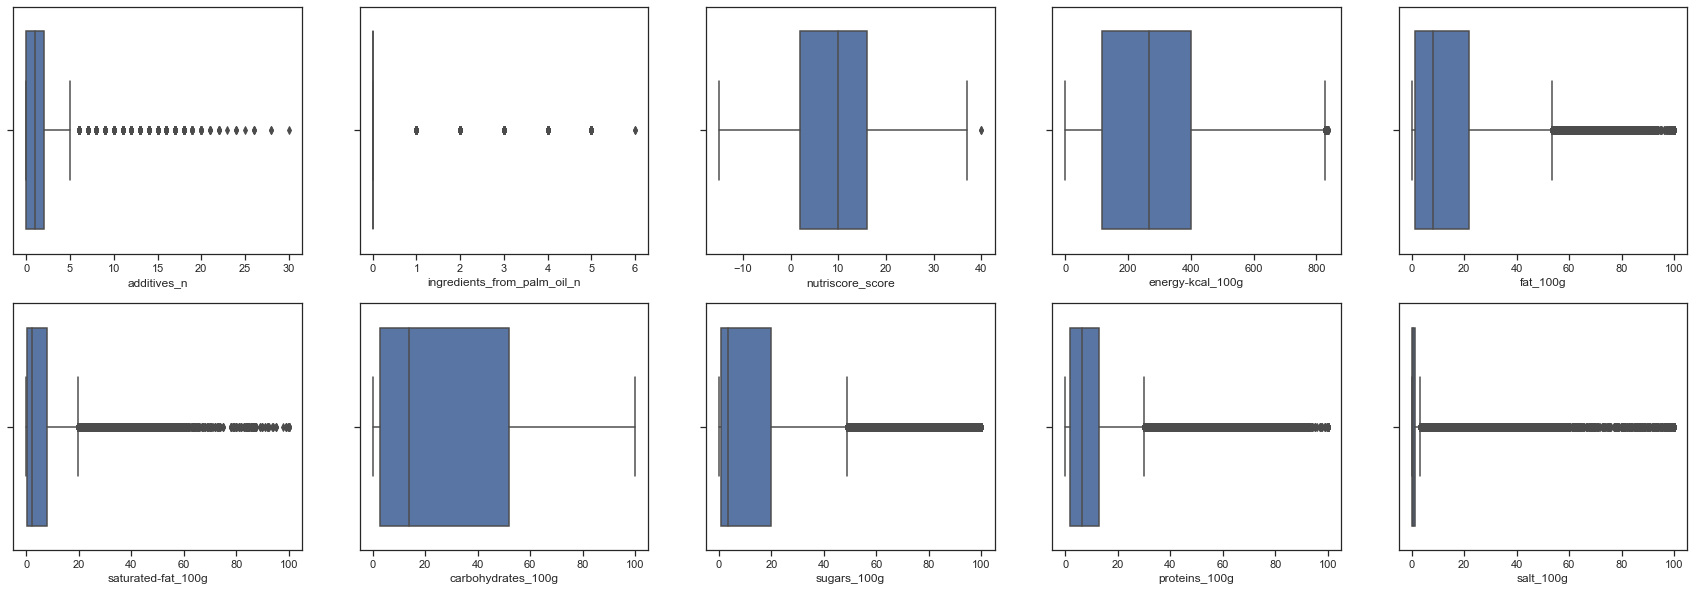

In [22]:
# Boxplot visualisation of data
plt.figure(figsize=(30,10))
for i, col in enumerate(numeric_cols): 
    plt.subplot(2, 5, i + 1)
    sns.boxplot(data = df_numeric, x = col)
plt.savefig('boxplot_numeric.png', bbox_inches="tight")

In [23]:
# List of continous varibale 
#df_numeric_imp = df_imputed.select_dtypes('float')
#numeric_cols = df_numeric_imp.columns.values
#print(numeric_cols)

In [24]:
# Boxplot visualisation of data
#plt.figure(figsize=(30,10))
#for i, col in enumerate(numeric_cols): 
#    plt.subplot(2, 4, i + 1)
#    sns.boxplot(data = df_numeric_imp, x = col)
#plt.show()

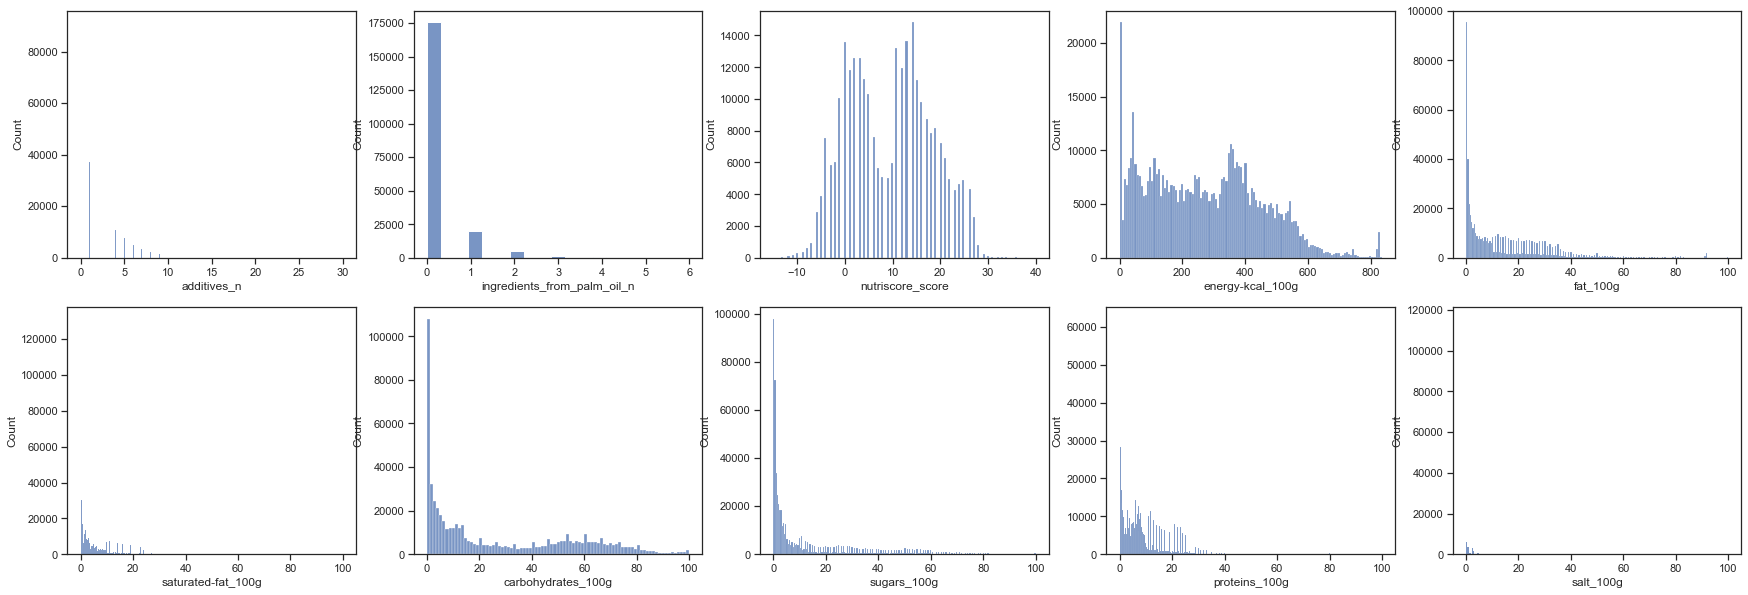

In [25]:
# Histogram visualisation of data (removed dataset)
plt.figure(figsize=(30,10))
for i, col in enumerate(numeric_cols): 
    plt.subplot(2, 5, i + 1)
    sns.histplot(data = df, x = col)
plt.savefig('hist_numeric.png', bbox_inches="tight")

In [26]:
# Histogram visualisation of data (imputed dataset)
#plt.figure(figsize=(30,10))
#for i, col in enumerate(numeric_cols): 
#    plt.subplot(2, 4, i + 1)
#    sns.histplot(data = df_numeric_imp, x = col)
#plt.show()

## 1.2. Categorical data

In [27]:
# List of categorcial varibale (removed dataset)
df_categorical = df.select_dtypes('object')
categorical_cols = df_categorical.columns.values
print(categorical_cols)

['code' 'creator' 'product_name' 'brands' 'categories' 'countries'
 'nutriscore_grade' 'nova_group' 'pnns_groups_1' 'pnns_groups_2'
 'created_years' 'last_modified_years']


In [28]:
# List of categorcial varibale (imputed dataset)
#df_categorical_imp = df_imputed.select_dtypes('object')
#categorical_cols = df_categorical_imp.columns.values
#print(categorical_cols)

In [29]:
df_categorical.drop(['code', 'creator', 'product_name', 'brands', 'categories', 'countries'],  axis = 1, inplace=True)
categorical_cols = df_categorical.columns.values

/Users/franck/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [30]:
# Count number of possibility
for col in categorical_cols:
    print(col, ':', len(df_categorical.loc[:,col].unique()))

nutriscore_grade : 6
nova_group : 5
pnns_groups_1 : 11
pnns_groups_2 : 40
created_years : 10
last_modified_years : 9


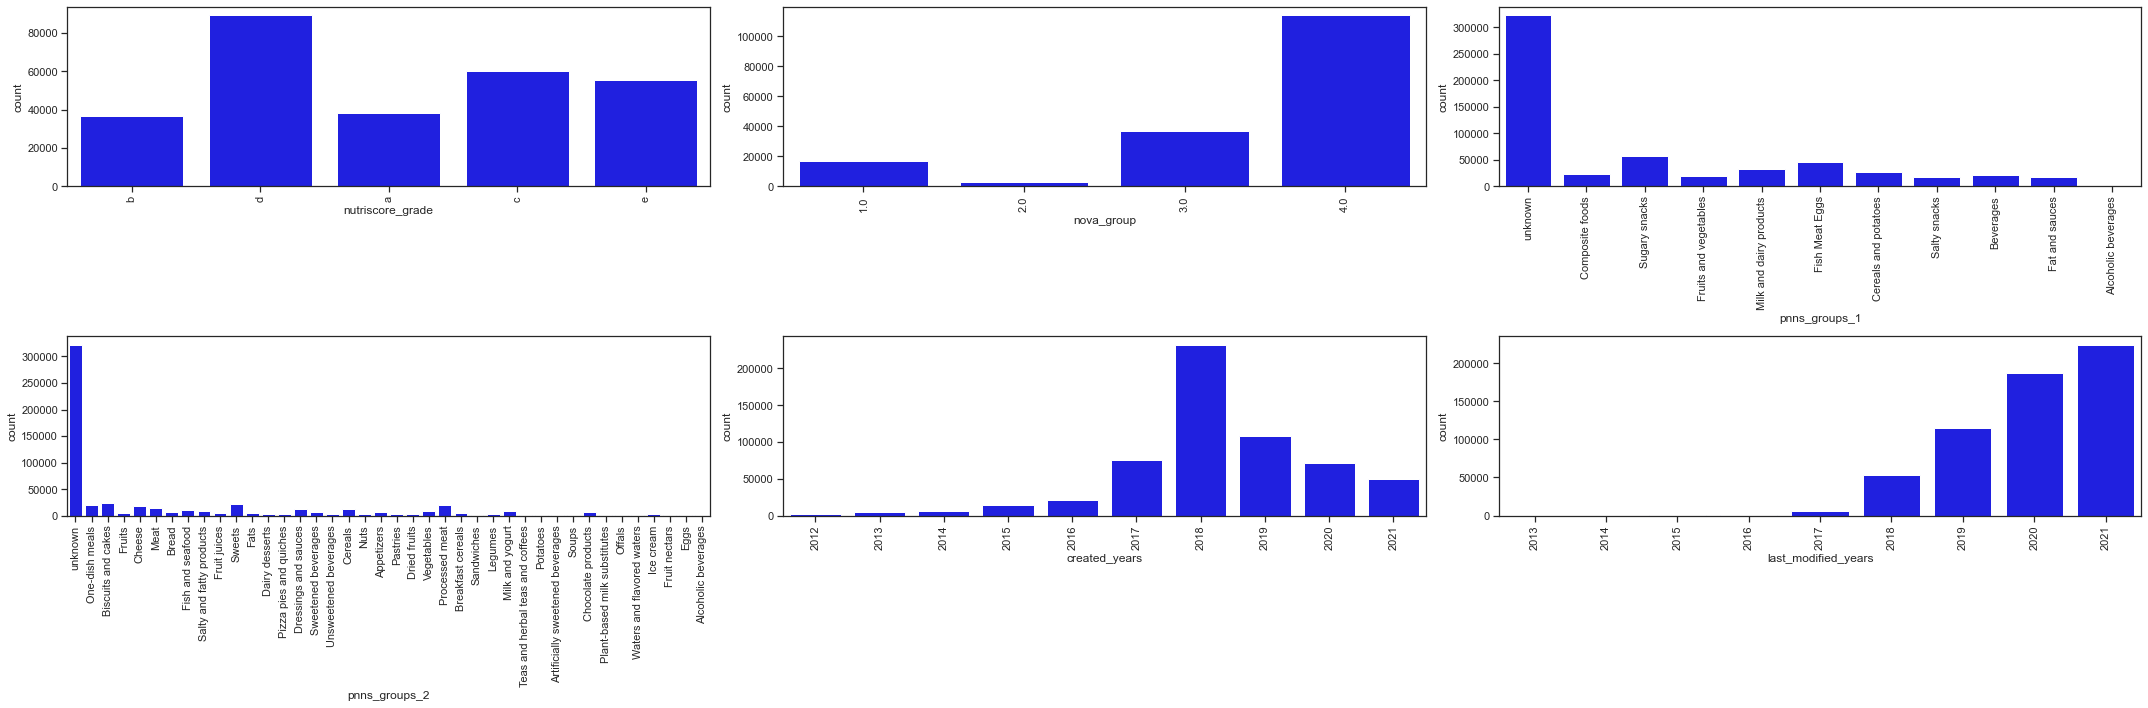

In [31]:
# Barchart visualisation of data
plt.figure(figsize=(30,10))
for i, col in enumerate(categorical_cols): 
    plt.subplot(2, 3, i + 1)
    sns.countplot(data = df_categorical, x = col, color='blue')
    plt.xticks(rotation = 90)
    plt.tight_layout() 
plt.savefig('barchart_cat.png', bbox_inches="tight")

In [32]:
df['pnns_groups_1'].unique()

array(['unknown', 'Composite foods', 'Sugary snacks',
       'Fruits and vegetables', 'Milk and dairy products',
       'Fish Meat Eggs', 'Cereals and potatoes', 'Salty snacks',
       'Beverages', 'Fat and sauces', 'Alcoholic beverages'], dtype=object)

In [33]:
# Barchart visualisation of data
#plt.figure(figsize=(30,10))
#for i, col in enumerate(categorical_cols): 
#    plt.subplot(2, 5, i + 1)
#    sns.countplot(data = df_categorical_imp, x = col, color='blue')
#    plt.xticks(rotation = 90)
#plt.show()

# 2. Bivariate analysis

### 2.1 Continious vs continious variable

In [ ]:
# Creation of a correlation matrix with all continous varibale 

#corr = df_numeric_imp.corr('spearman')
#corr.style.background_gradient(cmap='coolwarm')

corr = df_numeric.corr('spearman')
corr.style.background_gradient(cmap='coolwarm')

NameError: name 'df_numeric' is not defined

There are many rules of thumb on how to interpret the different values of (r) but the probably most common one was published in 2003 by Dennis E. Hinkle and his co-authors. So I will test the significancy of each correlation with r > .70 (< -.70)

In [ ]:
for row in corr.index:
    for col in corr.columns:
        if (row != col) and (corr.loc[row, col] > 0.5) or (corr.loc[row, col] < -0.5):
            print(f'{row :-<5} {col:-<50} {corr.loc[row, col]} ')

NameError: name 'corr' is not defined

<Figure size 2160x720 with 0 Axes>

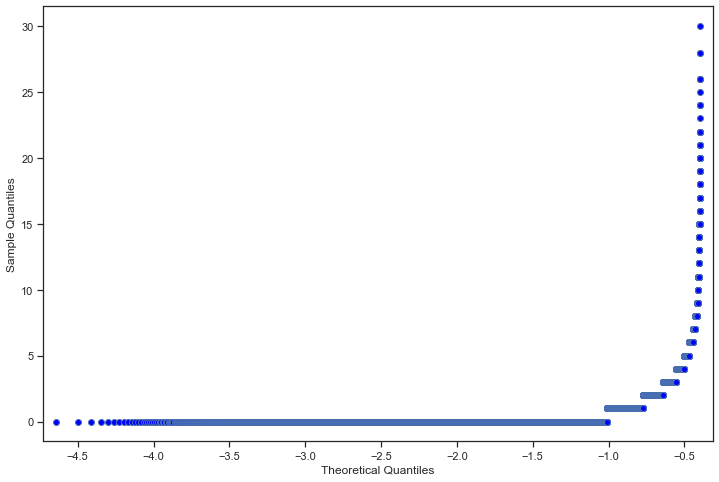

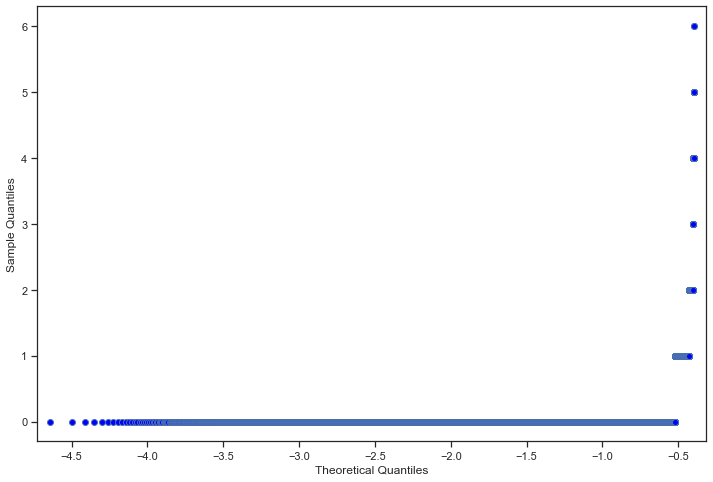

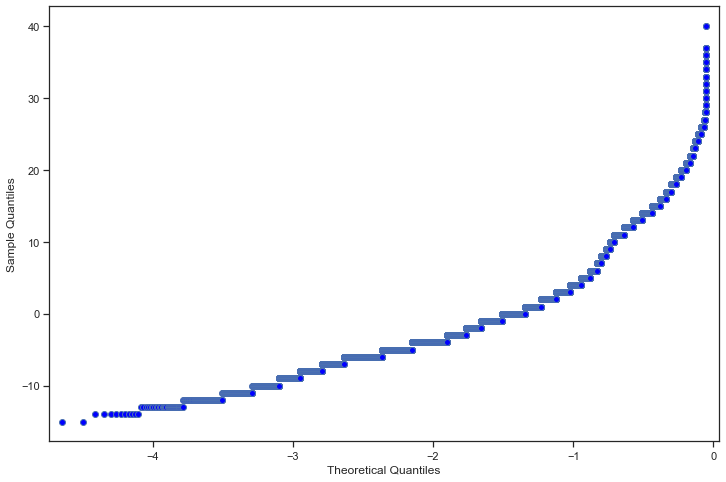

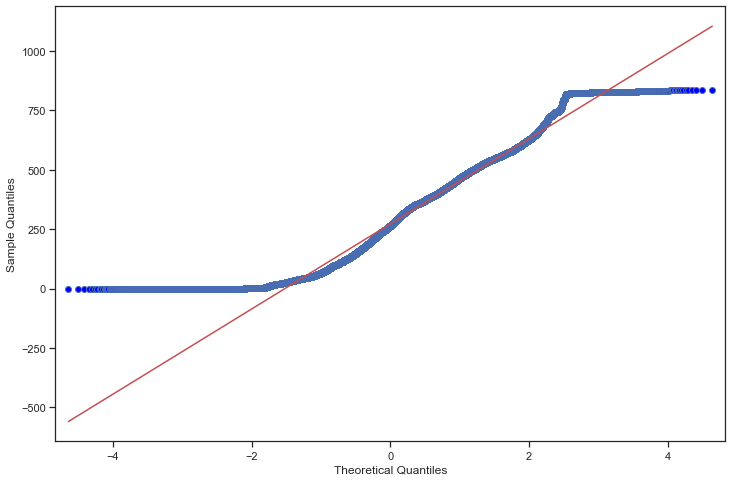

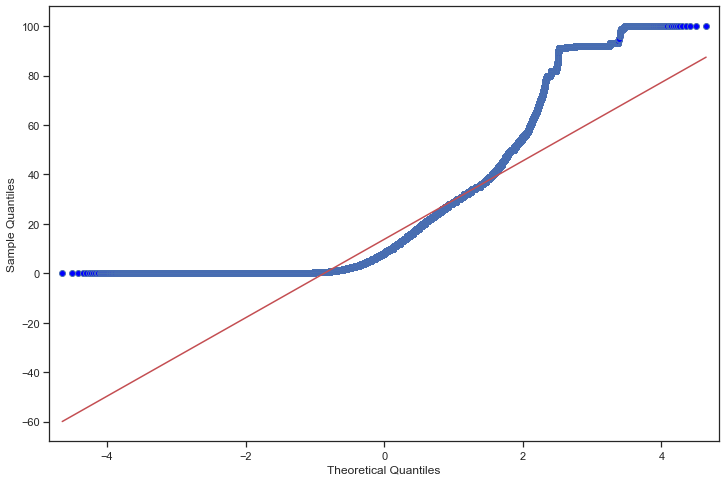

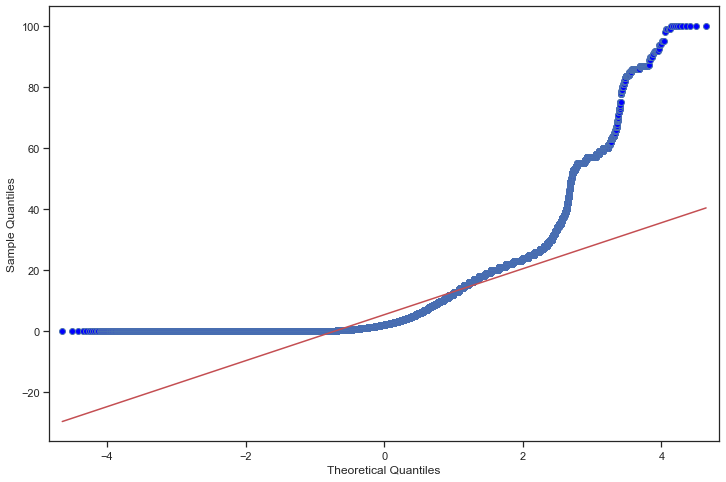

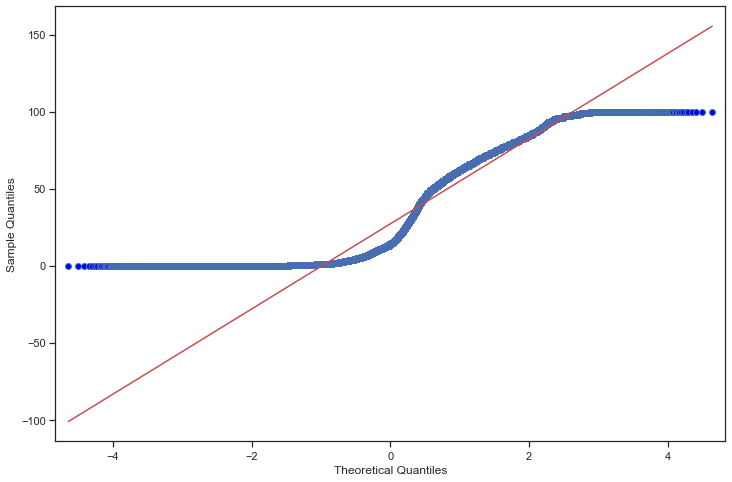

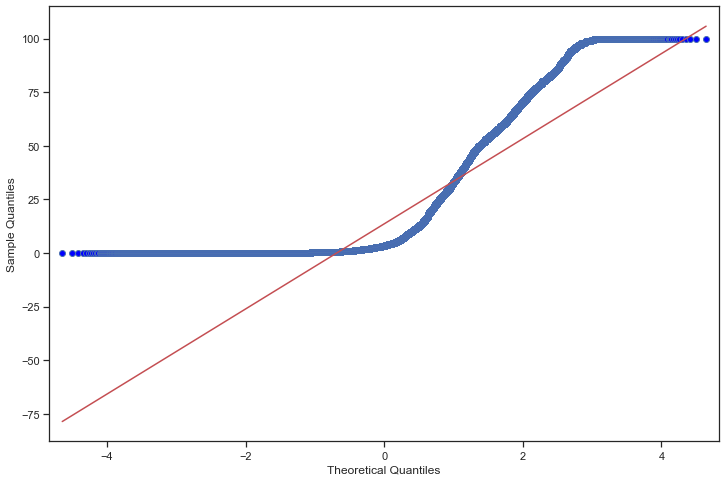

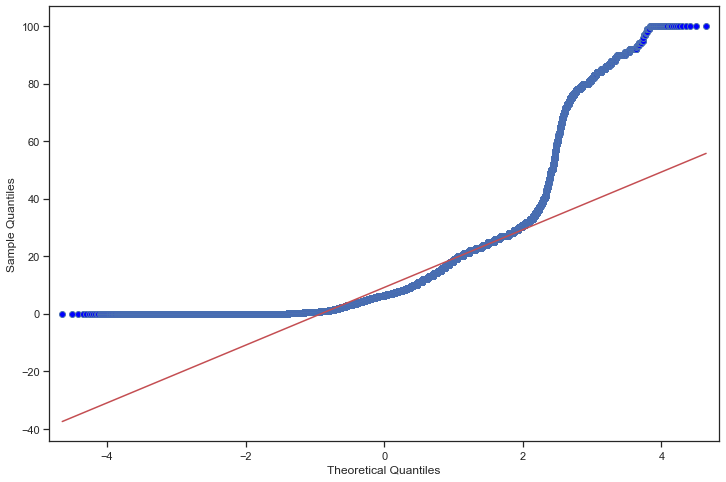

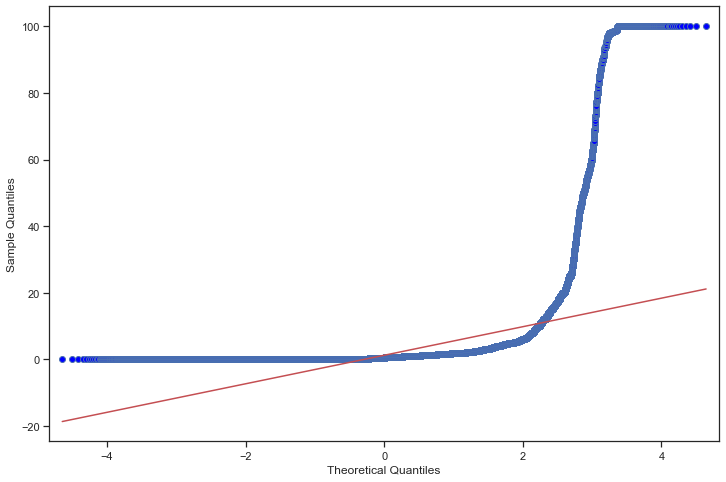

In [36]:
from statsmodels.graphics.gofplots import qqplot
#create Q-Q plot with 45-degree line added to plot
plt.figure(figsize=(30,10))
for i, col in enumerate(numeric_cols): 
    qqplot(df_numeric[col], line = 's')
plt.show()
    
# None of distribution follow a normal distribution -> spearman correlation

In [37]:
# Calculate spearman coefficient and p-value
spearman_coef, p_value = stats.spearmanr(np.array(df_numeric['saturated-fat_100g']), np.array(df_numeric['fat_100g']))

print("The Spearman Correlation Coefficient is", spearman_coef, " with a P-value of P =", p_value)

The Spearman Correlation Coefficient is 0.902472597522947  with a P-value of P = 0.0


In [38]:
# Calculate spearman coefficient and p-value
spearman_coef, p_value = stats.spearmanr(np.array(df_numeric['energy-kcal_100g']), np.array(df_numeric['fat_100g']))

print("The Spearman Correlation Coefficient is", spearman_coef, " with a P-value of P =", p_value)

The Spearman Correlation Coefficient is 0.7154205533808446  with a P-value of P = 0.0


In [39]:
# Calculate spearmancoefficient and p-value
spearman_coef, p_value = stats.spearmanr(np.array(df_numeric['sugars_100g']), np.array(df_numeric['carbohydrates_100g']))

print("The Spearman Correlation Coefficient is", spearman_coef, " with a P-value of P =", p_value)

The Spearman Correlation Coefficient is 0.7423984802781394  with a P-value of P = 0.0


### 2.2 Continous vs categorical variable (Understand the nutriscore)

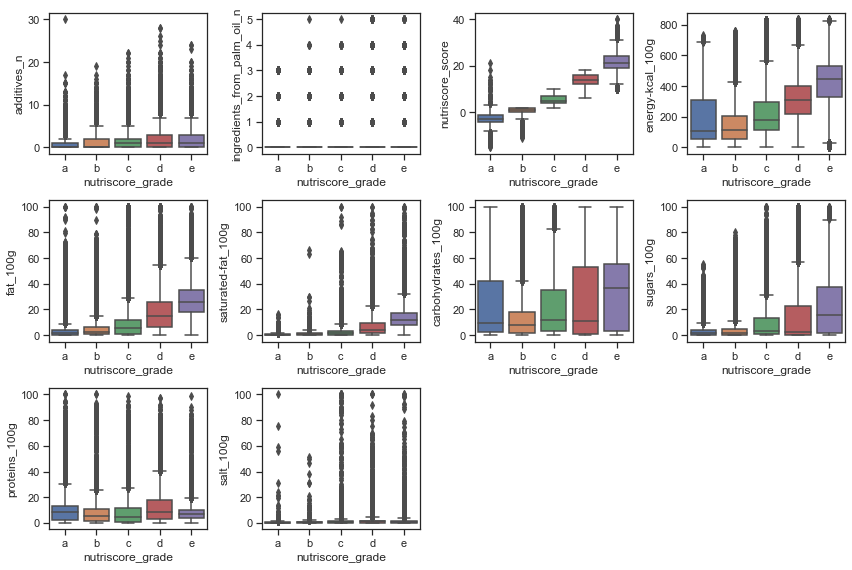

In [40]:
#Create a boxplot for all data 
plt.figure()
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df, x =  'nutriscore_grade', y = col, order=['a', 'b', 'c', 'd', 'e'])
    plt.tight_layout() 
plt.show()

In [41]:
df2 = df.loc[:,['nutriscore_score', 'nutriscore_grade', 'energy-kcal_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'salt_100g']]
df2.dropna(subset=['nutriscore_score'], axis = 0, inplace = True)

In [42]:
df2.isnull().mean()*100

nutriscore_score      0.0
nutriscore_grade      0.0
energy-kcal_100g      0.0
fat_100g              0.0
saturated-fat_100g    0.0
carbohydrates_100g    0.0
sugars_100g           0.0
proteins_100g         0.0
salt_100g             0.0
dtype: float64

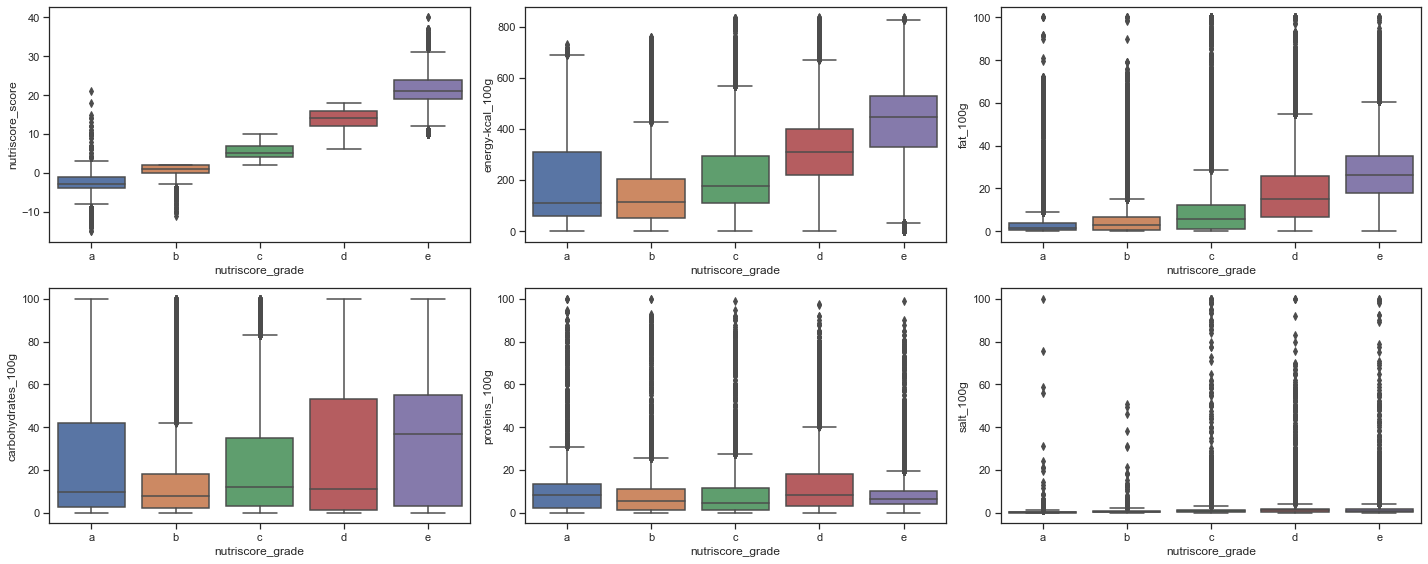

In [43]:
#Create a boxplot for all data 
ANOVA_list = ['nutriscore_score', 'energy-kcal_100g', 'fat_100g', 'carbohydrates_100g', 'proteins_100g', 'salt_100g']
plt.figure(figsize=(20,8))
for i, col in enumerate(ANOVA_list):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df, x =  'nutriscore_grade', y = col, order=['a', 'b', 'c', 'd', 'e'])
    plt.tight_layout() 
plt.show()

<Figure size 864x576 with 0 Axes>

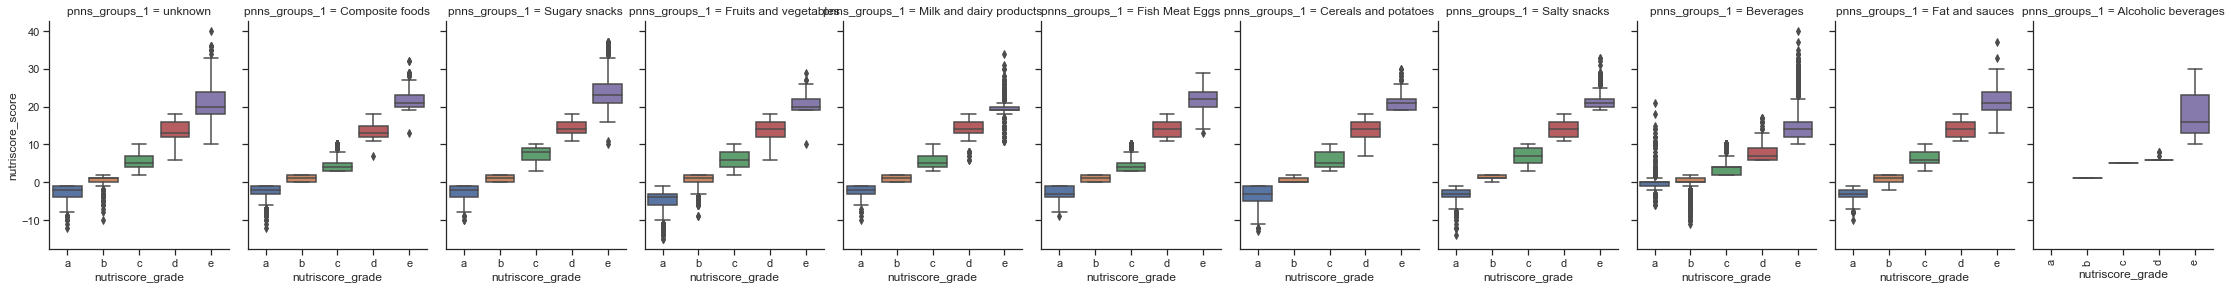

<Figure size 864x576 with 0 Axes>

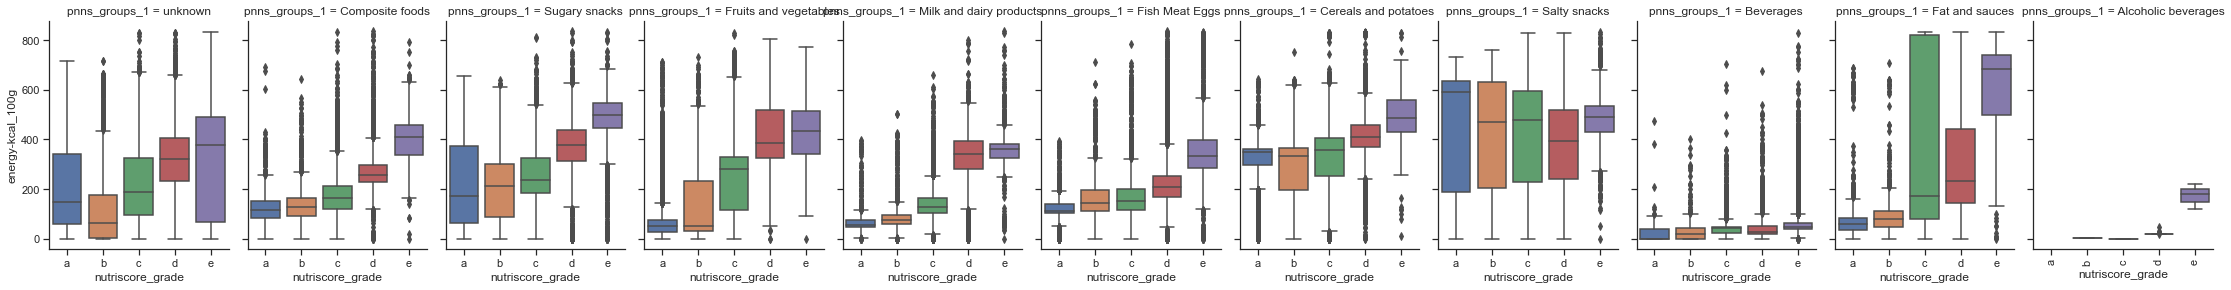

<Figure size 864x576 with 0 Axes>

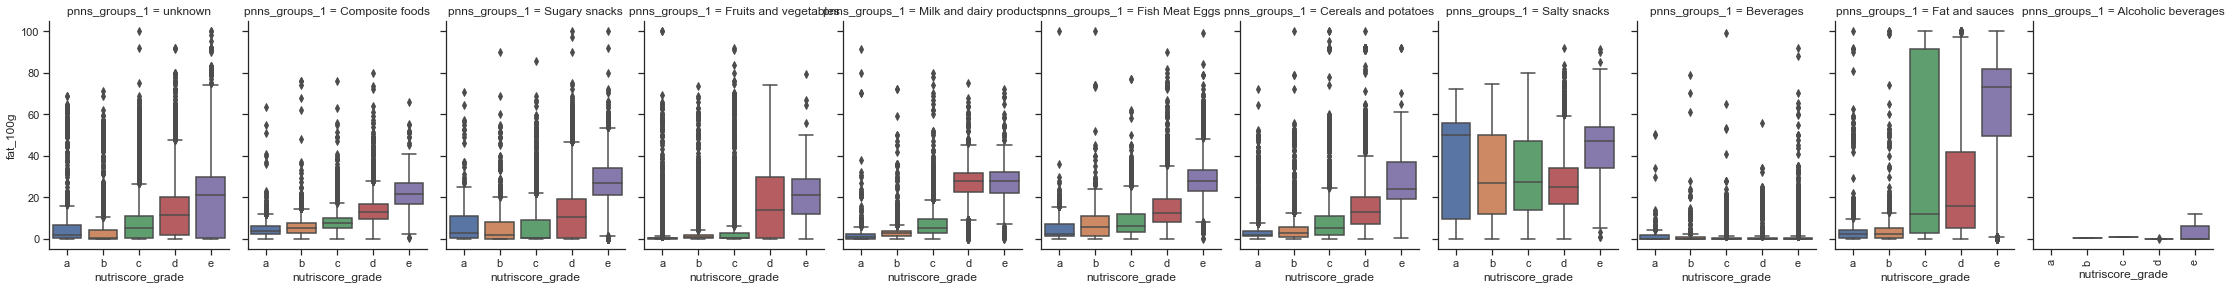

<Figure size 864x576 with 0 Axes>

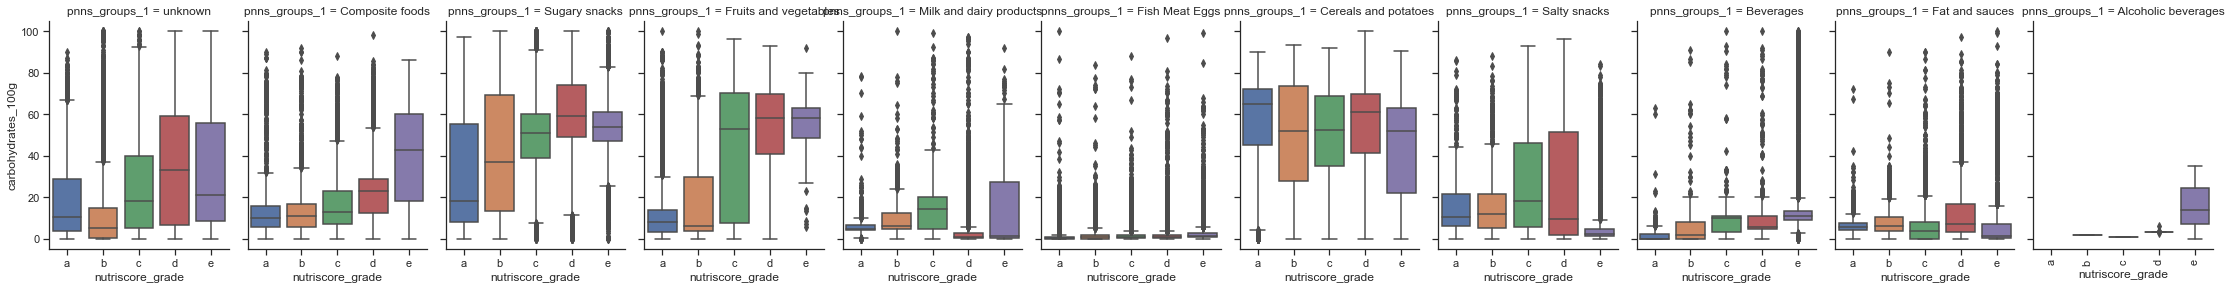

<Figure size 864x576 with 0 Axes>

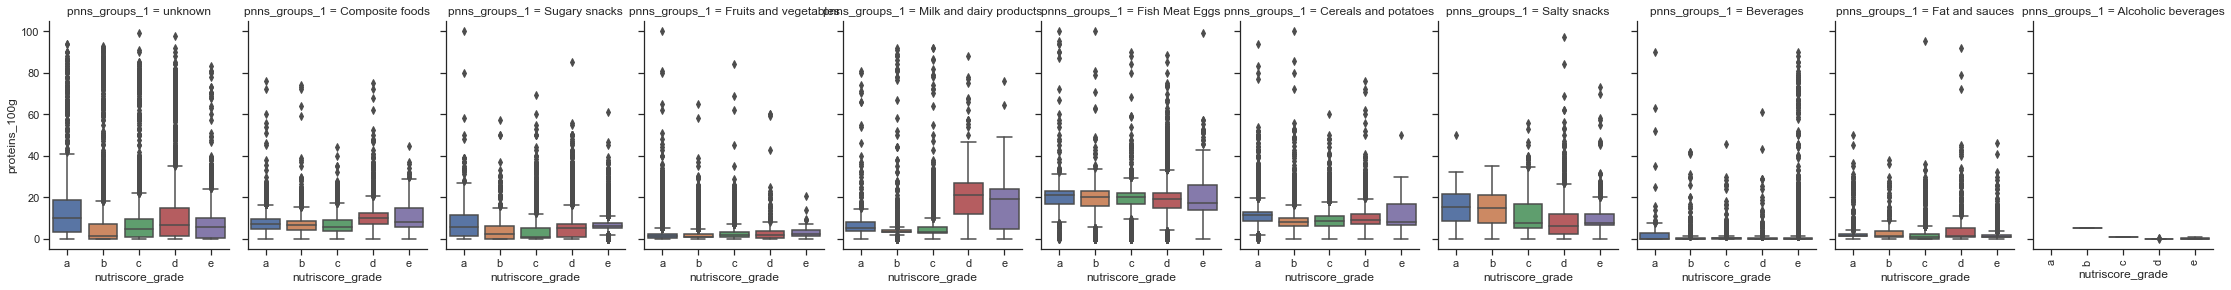

<Figure size 864x576 with 0 Axes>

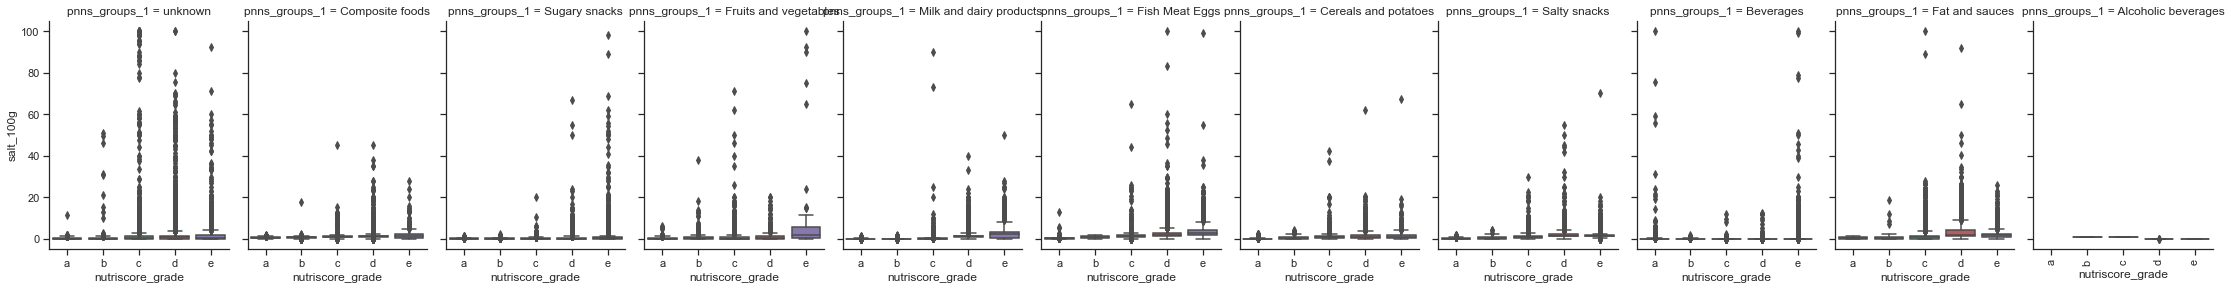

In [44]:
#Create a boxplot for all data 3 variables analysis

for i, col in enumerate(ANOVA_list):
    plt.figure()
    sns.catplot(data=df, kind = 'box', x =  'nutriscore_grade', y = col, col = 'pnns_groups_1', order=['a', 'b', 'c', 'd', 'e'], aspect=.7, height = 4)
    plt.xticks(rotation = 90)
    plt.show()


#### 2.2.1 ANOVA

In [45]:
#ANOVA for nutriscore grade
import scipy.stats as stats

dv = 'nutriscore_grade'
ivs = ['energy-kcal_100g', 'fat_100g', 'carbohydrates_100g', 'proteins_100g', 'salt_100g']
print('nutriscore_grade')
    
for iv in ivs:
# Create dataset for each nutriscore grade
    nutri_grade = df.groupby(dv)[iv]
    datasets = {}
    for groups, data in nutri_grade:
        datasets[groups] = data
    
    fvalue, pvalue = stats.f_oneway(datasets['a'].dropna(),
               datasets['b'].dropna(),
               datasets['c'].dropna(),
               datasets['d'].dropna(),
               datasets['e'].dropna())

    print(f' {iv :_<50} {fvalue :_<20} {pvalue}')

nutriscore_grade
 energy-kcal_100g__________________________________ 23024.763504033013__ 0.0
 fat_100g__________________________________________ 19116.276285906515__ 0.0
 carbohydrates_100g________________________________ 2349.3998800103213__ 0.0
 proteins_100g_____________________________________ 1809.817486616873___ 0.0
 salt_100g_________________________________________ 2499.8071734303007__ 0.0


In [46]:
# ANOVA with different methods
import statsmodels.api as sm
from statsmodels.formula.api import ols
iv = 'fat_100g'

df_aov = df.dropna(subset=[iv], axis = 0) 
model = ols(f'{iv}~C({dv})', data=df_aov.sample(10000)).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
print(f' {iv}')
print(aov_table, '\n')

 fat_100g
                           sum_sq      df           F         PR(>F)
C(nutriscore_grade)  3.000823e+05     4.0  307.333393  1.630415e-235
Residual             1.162900e+06  4764.0         NaN            NaN 



In [47]:
#perform two-way ANOVA
model = ols('carbohydrates_100g~ C(nutriscore_grade) + C(pnns_groups_1) ', data=df.dropna()).fit()
sm.stats.anova_lm(model, typ = 2)

,sum_sq,df,F,PR(>F)
C(nutriscore_grade),1.267801e+06,4.0,1092.613642,0.0
C(pnns_groups_1),5.608299e+07,10.0,19333.324813,0.0
Residual,4.072671e+07,140396.0,NaN,NaN


In [48]:
# creation of contengency table
X = "pnns_groups_1"
Y = "nutriscore_grade"
cont = df[[X, Y]].sample(10000).pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy().astype(int)
cont

nutriscore_grade,a,b,c,d,e
pnns_groups_1,,,,,
Beverages,13,58,83,59,120
Cereals and potatoes,205,94,80,74,12
Composite foods,61,116,135,69,15
Fat and sauces,11,11,89,121,66
Fish Meat Eggs,104,110,151,263,138
Fruits and vegetables,204,44,67,12,0
Milk and dairy products,37,78,129,277,24
Salty snacks,12,25,94,114,68
Sugary snacks,10,19,110,372,403


<AxesSubplot:xlabel='pnns_groups_1'>

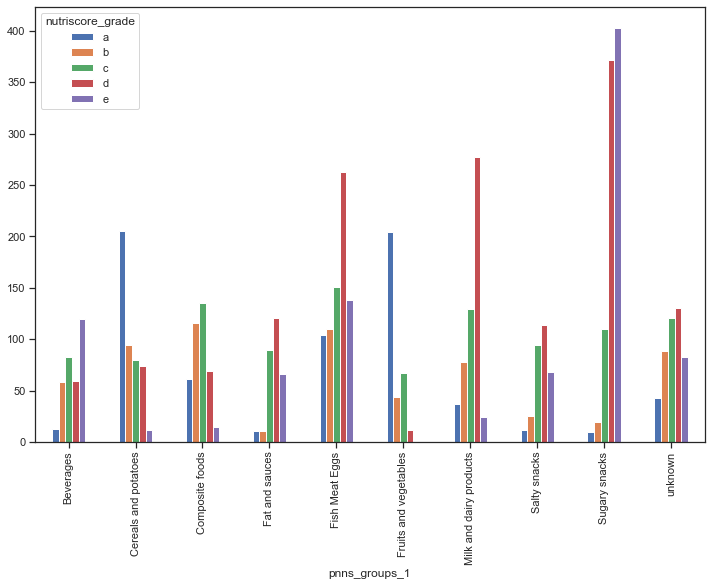

In [49]:
# Barchart contengency table
cont.plot(kind='bar')

In [50]:
# Khi2 test between nutriscore grade and pnns_goups_1
st_chi2, st_p, st_dof, st_exp = stats.chi2_contingency(cont)
print(st_p)

0.0


In [51]:
# Individualised 

df_aov = df.dropna(subset=[iv], axis = 0) 
model = ols(f'{iv}~C({dv})', data=df_aov.sample(10000)).fit()
aov_table = sm.stats.anova_lm(model, typ=2)

#"""
#The function below was created specifically for the one-way ANOVA table results returned for Type II sum of squares
#"""

def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(nutriscore_grade),3.185473e+05,4.0,79636.824835,350.464916,4.067275e-265,0.225747,0.225067
Residual,1.092531e+06,4808.0,227.231946,NaN,NaN,NaN,NaN


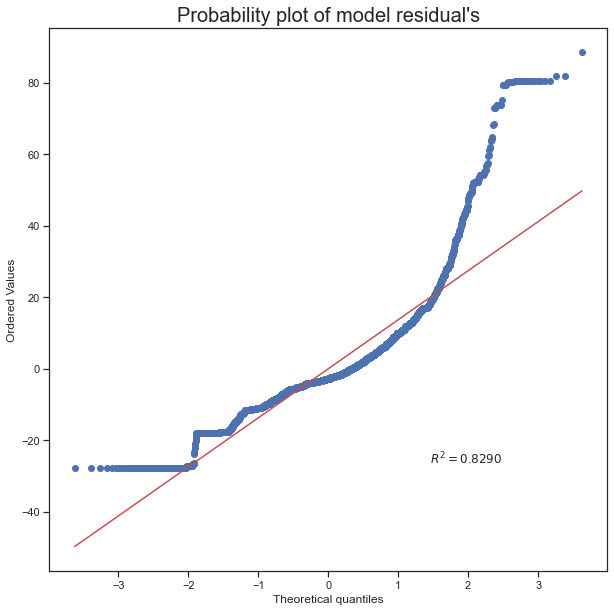

In [52]:
# QQ-plot to check assumption of normality 

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()


In [53]:
# Shapiro Wilk is no good for n > 5000 

#w, pvalue = stats.shapiro(mod.resid)
#print(w, pvalue)

In [54]:
# Levene Test for assumption of heteroskedacity
for iv in ivs:
    fvalue, pvalue = stats.levene(df2[iv][df2[dv] == 'a'],
                 df2[iv][df2[dv] == 'b'],
                 df2[iv][df2[dv] == 'c'],
                 df2[iv][df2[dv] == 'd'],
                 df2[iv][df2[dv] == 'e'])
    print(f' {iv :_<50} {fvalue :_<20} {pvalue}')

 energy-kcal_100g__________________________________ 826.1012741800314___ 0.0
 fat_100g__________________________________________ 5847.549169902143___ 0.0
 carbohydrates_100g________________________________ 2861.1582818245206__ 0.0
 proteins_100g_____________________________________ 1432.0711827905106__ 0.0
 salt_100g_________________________________________ 1675.720503537923___ 0.0


In [55]:
# perform Tukey's test - post hoc test 
import statsmodels.stats.multicomp as mc
for iv in ivs:
    comp = mc.MultiComparison(df2.dropna()[iv], df2.dropna()[dv])
    post_hoc_res = comp.tukeyhsd()
    print(f' {iv :_<10}{post_hoc_res.summary()} \n')



 energy-kcal_100g Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
     a      b -16.6576 0.001 -19.7859 -13.5293   True
     a      c  61.8087 0.001  59.0098  64.6076   True
     a      d 147.7547 0.001 145.1387 150.3707   True
     a      e 241.1973 0.001 238.3533 244.0412   True
     b      c  78.4663 0.001  75.6291  81.3035   True
     b      d 164.4123 0.001 161.7553 167.0692   True
     b      e 257.8548 0.001 254.9731 260.7365   True
     c      d   85.946 0.001  83.6862  88.2059   True
     c      e 179.3886 0.001 176.8683 181.9088   True
     d      e  93.4426 0.001  91.1271   95.758   True
----------------------------------------------------- 

 fat_100g__Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     a      b   1.5517 0.001  1.2515  1.8518   True
     a

In [56]:
#Bonferonni
for iv in ivs:
    comp = mc.MultiComparison(df2.dropna()[iv], df2.dropna()[dv])
    tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method= "bonf")
    print(f' {iv :_<10}{tbl} \n')

 energy-kcal_100gTest Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.01, alphacBonf=0.005
group1 group2    stat   pval pval_corr reject
---------------------------------------------
     a      b   16.5333  0.0       0.0   True
     a      c  -56.7983  0.0       0.0   True
     a      d -170.8552  0.0       0.0   True
     a      e -224.1214  0.0       0.0   True
     b      c  -71.7651  0.0       0.0   True
     b      d -189.4503  0.0       0.0   True
     b      e -238.9231  0.0       0.0   True
     c      d -102.5552  0.0       0.0   True
     c      e -171.0153  0.0       0.0   True
     d      e -111.1126  0.0       0.0   True
--------------------------------------------- 

 fat_100g__Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.01, alphacBonf=0.005
group1 group2    stat   pval pval_corr reject
---------------------------------------------
     a      b  -24.7654  0.0       0.0   True
     a      c  -77.0074  0.0       0.0   True
  

#### 2.2.1 Kruskal Wallis

In [57]:
# Kruskal Wallis test for nutriscore grade

dv = 'nutriscore_grade'
print('nutriscore_grade')
    
for iv in ivs:
# Create dataset for each nutriscore grade
    nutri_grade = df.sample(10000).groupby(dv)[iv]
    datasets = {}
    for groups, data in nutri_grade:
        datasets[groups] = data
    
    fvalue, pvalue = stats.kruskal(datasets['a'],
               datasets['b'],
               datasets['c'],
               datasets['d'],
               datasets['e'], nan_policy='omit')

    print(f' {iv :_<50} {fvalue :_<20} {pvalue}')

nutriscore_grade
 energy-kcal_100g__________________________________ 1291.6261126230768__ 2.176366742003049e-278
 fat_100g__________________________________________ 1302.5559236539618__ 9.289828549225415e-281
 carbohydrates_100g________________________________ 122.44932998210821__ 1.601136673901042e-25
 proteins_100g_____________________________________ 139.1148553247614___ 4.3665227782426484e-29
 salt_100g_________________________________________ 548.6181099656867___ 2.0366273917232336e-117


In [58]:
#perform Dunn's test using a Bonferonni correction for the p-values
import scikit_posthocs as sp
for iv in ivs:
# Create dataset for each nutriscore grade
    nutri_grade = df.groupby(dv)[iv]
    datasets = {}
    for groups, data in nutri_grade:
        datasets[groups] = data

    data = [datasets['a'],
               datasets['b'],
               datasets['c'],
               datasets['d'],
               datasets['e']]
    res = sp.posthoc_dunn(data, p_adjust = 'bonferroni')
    print(f' {iv :_<10}{res} \n')

 energy-kcal_100g              1             2    3    4    5
1  1.000000e+00  1.526962e-42  0.0  0.0  0.0
2  1.526962e-42  1.000000e+00  0.0  0.0  0.0
3  0.000000e+00  0.000000e+00  1.0  0.0  0.0
4  0.000000e+00  0.000000e+00  0.0  1.0  0.0
5  0.000000e+00  0.000000e+00  0.0  0.0  1.0 

 fat_100g__               1              2    3    4    5
1   1.000000e+00  4.360423e-101  0.0  0.0  0.0
2  4.360423e-101   1.000000e+00  0.0  0.0  0.0
3   0.000000e+00   0.000000e+00  1.0  0.0  0.0
4   0.000000e+00   0.000000e+00  0.0  1.0  0.0
5   0.000000e+00   0.000000e+00  0.0  0.0  1.0 

 carbohydrates_100g               1              2              3              4    5
1   1.000000e+00  2.436329e-133   5.311339e-08   9.250041e-13  0.0
2  2.436329e-133   1.000000e+00  3.500306e-237  9.189839e-289  0.0
3   5.311339e-08  3.500306e-237   1.000000e+00   1.000000e+00  0.0
4   9.250041e-13  9.189839e-289   1.000000e+00   1.000000e+00  0.0
5   0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00 

## PCA vs manual selection of predictor to predict nutriscore

In [59]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280279 entries, 4 to 585111
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nutriscore_score    280279 non-null  float64
 1   nutriscore_grade    280279 non-null  object 
 2   energy-kcal_100g    280279 non-null  float64
 3   fat_100g            280279 non-null  float64
 4   saturated-fat_100g  280279 non-null  float64
 5   carbohydrates_100g  280279 non-null  float64
 6   sugars_100g         280279 non-null  float64
 7   proteins_100g       280279 non-null  float64
 8   salt_100g           280279 non-null  float64
dtypes: float64(8), object(1)
memory usage: 21.4+ MB


In [60]:
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### PCA

In [62]:
# Create features and target values
X = df2.loc[:, ['energy-kcal_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'salt_100g']].values
y = df2.loc[:, ['nutriscore_score']].values

In [63]:
# Split the dataset into training (80%) and testing (20%) sets

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

Text(0.5, 1.0, 'Nutriscore score')

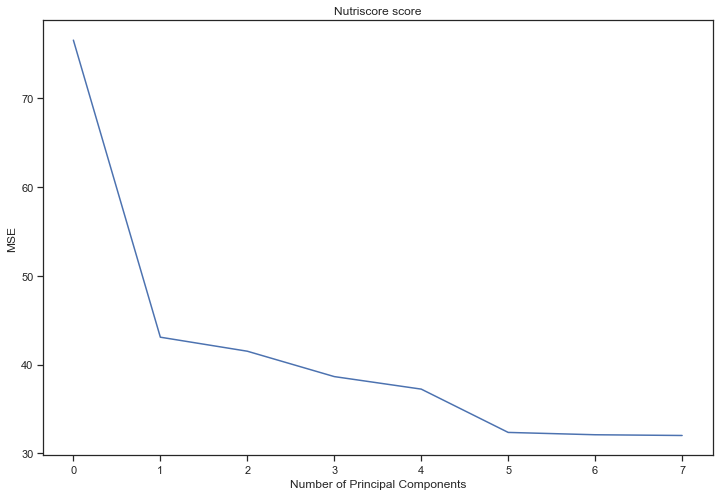

In [66]:
# Find the best number of component for linear regression using cross validation on the full dataset
pca = PCA()
X_reduced = pca.fit_transform(scale(X_train))

# Define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_reduced),1)), y_train, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 8):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], y_train, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('Nutriscore score')

In [67]:
# PCA on train and test with 5 principal component
pca = PCA(n_components = 5)
X_train_reduced = pca.fit_transform(scale(X_train))
X_test_reduced = pca.transform(scale(X_test))

In [68]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([35.35, 64.87, 78.83, 89.87, 95.71])

In [69]:
# Visualising new dataset
principalDf = pd.DataFrame(data = X_train_reduced
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])

finalDf = pd.concat([principalDf, pd.Series(np.squeeze(y_train))], axis = 1)

finalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,0
0,-1.699163,0.390522,-0.337521,0.296437,0.028640,-5.0
1,0.360333,-0.962337,0.208771,-0.223464,-0.598505,12.0
2,-0.739697,-0.719241,-0.484940,0.466439,0.473474,11.0
3,-1.960458,0.548247,-0.572710,0.844583,0.158786,4.0
4,-0.914320,-2.157775,0.081716,0.158575,0.590936,10.0


### Linear regression

In [80]:
#train PCA model on training data 
regr = LinearRegression()
regr.fit(X_train_reduced, y_train)


pred = regr.predict(X_test_reduced)
pred 

array([[10.73746138],
       [ 7.06047387],
       [ 8.19363255],
       ...,
       [17.54880123],
       [20.76722886],
       [14.68134251]])

In [82]:
#calculate RMSE
np.sqrt(mean_squared_error(y_test, pred))

5.6988090747044176

In [83]:
#display adjusted R-squared
1 - (1-regr.score(X_test_reduced, y_test))*(len(y_test)-1)/(len(y_test)-X_test_reduced.shape[1]-1)

0.5797151625620823

In [84]:
#train model on training data 
regr = LinearRegression()
regr.fit(X_train, y_train)

pred = regr.predict(X_test)
pred

array([[11.09595225],
       [ 7.37861117],
       [ 8.36977205],
       ...,
       [18.15974264],
       [21.12251252],
       [15.20964355]])

In [85]:
#calculate RMSE
np.sqrt(mean_squared_error(y_test, pred))

5.6732771449772015

In [86]:
#display adjusted R-squared
1 - (1-regr.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5834578019455865

The RMSE is the same for the reuced dataset or the normal one so I don't need to use the PCA

### KNN regression

In [87]:
from sklearn import neighbors

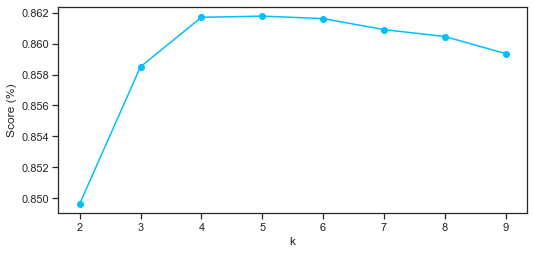

In [88]:
# Finding optimal k
score = []
for k in range(2,10):
    knn = neighbors.KNeighborsRegressor(k)
    score.append(knn.fit(X_train, y_train).score(X_test, y_test))
    
plt.figure(figsize = (8.4, 3.8))
plt.plot(range(2,10), score, 'o-', c='deepskyblue')
plt.xlabel('k')
plt.ylabel('Score (%)')
plt.show()

In [90]:
#train model on training data 
knn = neighbors.KNeighborsRegressor(5)
knn.fit(X_train, y_train)

#calculate RMSE
pred = knn.predict(X_test)
pred

array([[ 7.8],
       [13.8],
       [12.4],
       ...,
       [14.8],
       [26.2],
       [14. ]])

In [91]:
#calculate RMSE
np.sqrt(mean_squared_error(y_test, pred))

3.2682950498969805

In [95]:
#display adjusted R-squared
1 - (1-knn.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.861760066184034

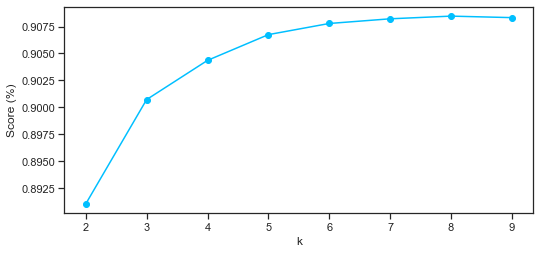

In [96]:
# Finding optimal k
score = []
for k in range(2,10):
    knn = neighbors.KNeighborsRegressor(k)
    score.append(knn.fit(X_train_reduced, y_train).score(X_test_reduced, y_test))
    
plt.figure(figsize = (8.4, 3.8))
plt.plot(range(2,10), score, 'o-', c='deepskyblue')
plt.xlabel('k')
plt.ylabel('Score (%)')
plt.show()

In [97]:
#train PCR model on training data 
knn = neighbors.KNeighborsRegressor(10)
knn.fit(X_train_reduced, y_train)


pred = knn.predict(X_test_reduced)

In [98]:
#calculate RMSE
np.sqrt(mean_squared_error(y_test, pred))

2.6614677375563613

In [100]:
#display adjusted R-squared
1 - (1-knn.score(X_test_reduced, y_test))*(len(y_test)-1)/(len(y_test)-X_test_reduced.shape[1]-1)

0.9083319654177131

The best model is the KNN regression with all the full data RMSE = 2,56

### Decision Tree regression

In [130]:
#train model on training data

from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=0)
tree.fit(X_train, y_train)

#calculate RMSE
pred = tree.predict(X_test)
pred

array([12., 14., 12., ..., 18., 26., 14.])

In [131]:
#calculate RMSE
np.sqrt(mean_squared_error(y_test, pred))

3.084476032559937

In [132]:
#display adjusted R-squared
1 - (1-tree.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.8768728563046864

In [133]:
#train model on PCA training data

from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=0)
tree.fit(X_train_reduced, y_train)

#calculate RMSE
pred = tree.predict(X_test_reduced)
pred

array([18.        , 14.        , 11.14285714, ..., 18.        ,
       27.        , 14.        ])

In [134]:
#calculate RMSE
np.sqrt(mean_squared_error(y_test, pred))

3.628455452706389

In [135]:
#display adjusted R-squared
1 - (1-tree.score(X_test_reduced, y_test))*(len(y_test)-1)/(len(y_test)-X_test_reduced.shape[1]-1)

0.8296198097040718

### Random Forest

In [143]:
#train model on training data

from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 10, random_state = 0)
forest.fit(X_train, np.ravel(y_train))

pred = forest.predict(X_test)
pred

array([15.9, 14. , 12. , ..., 16.4, 26. , 14. ])

In [137]:
#calculate RMSE
np.sqrt(mean_squared_error(y_test, pred))

2.4510520803143

In [138]:
#display adjusted R-squared
1 - (1-forest.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.9222507723542211

In [145]:
#train model on PCA training data
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 10, random_state = 0)
forest.fit(X_train_reduced, np.ravel(y_train))

pred = forest.predict(X_test_reduced)
pred

array([14.15, 14.  , 12.2 , ..., 14.4 , 25.85, 14.6 ])

In [140]:
#calculate RMSE
np.sqrt(mean_squared_error(y_test, pred))

2.7396250640443296

In [141]:
#display adjusted R-squared
1 - (1-forest.score(X_test_reduced, y_test))*(len(y_test)-1)/(len(y_test)-X_test_reduced.shape[1]-1)

0.9028690202376575

In [150]:
#Create a KNN model for each pnns group 1 then impute missing nutriscore 

df_final = pd.DataFrame()
for cat in df.loc[:,'pnns_groups_1'].unique():
    df3 = df.loc[df.loc[:,'pnns_groups_1'] == cat,:]
    
    mask = df3.loc[df3['nutriscore_score'].notna(),]
    X = mask.loc[:, ['energy-kcal_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'salt_100g']].values
    y = mask.loc[:, ['nutriscore_score']].values
    
    forest = RandomForestRegressor(n_estimators = 10, random_state = 0)
    forest.fit(X, np.ravel(y))
    
    mask_nan = df3.loc[df3['nutriscore_score'].isna(),]
    X_pred = mask_nan.loc[:,['energy-kcal_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'salt_100g']].values

    y_pred = pd.DataFrame(forest.predict(X_pred))

    y_pred.index = mask_nan.index

    df3.loc[:,'nutriscore_score'] = df3.loc[:,'nutriscore_score'].fillna(round(y_pred.iloc[:,0],0))
    df_final = df_final.append(df3)
print(df_final.isna().sum())

/Users/franck/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/Users/franck/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/Users/franck/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy o

code                                0
creator                             0
product_name                        0
brands                              0
categories                          0
countries                           0
additives_n                    383264
ingredients_from_palm_oil_n    383264
nutriscore_score                    0
nutriscore_grade               304834
nova_group                     415208
pnns_groups_1                       0
pnns_groups_2                       0
energy-kcal_100g                    0
fat_100g                            0
saturated-fat_100g                  0
carbohydrates_100g                  0
sugars_100g                         0
proteins_100g                       0
salt_100g                           0
created_years                       0
last_modified_years                 0
dtype: int64


In [147]:
df_final.head()

,code,creator,product_name,brands,categories,countries,additives_n,ingredients_from_palm_oil_n,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,created_years,last_modified_years
0,0000000000017,Kiliweb,Vitória crackers,unknown,unknown,France,NaN,NaN,14.0,NaN,NaN,unknown,unknown,375.0,7.0,3.08,70.1,15.0,7.8,1.40,2018,2019
1,0000000000123,Kiliweb,Sauce sweety chili 0%,unknown,unknown,France,NaN,NaN,10.0,NaN,NaN,unknown,unknown,21.0,0.0,0.00,4.8,0.4,0.2,2.04,2018,2018
2,0000000000178,Kiliweb,Mini coco,unknown,unknown,France,NaN,NaN,4.0,NaN,NaN,unknown,unknown,60.0,3.0,1.00,10.0,3.0,2.0,1.15,2018,2018
3,000000000080,Kiliweb,Pur jus de pomme,unknown,unknown,En:fr,NaN,NaN,19.0,NaN,NaN,unknown,unknown,63.0,0.0,0.00,15.5,15.5,0.2,0.00,2021,2021
5,0000000000970,Kiliweb,Fromage blanc aux myrtilles,unknown,unknown,France,NaN,NaN,5.0,NaN,NaN,unknown,unknown,129.0,4.9,3.10,16.3,16.3,4.4,0.25,2018,2019


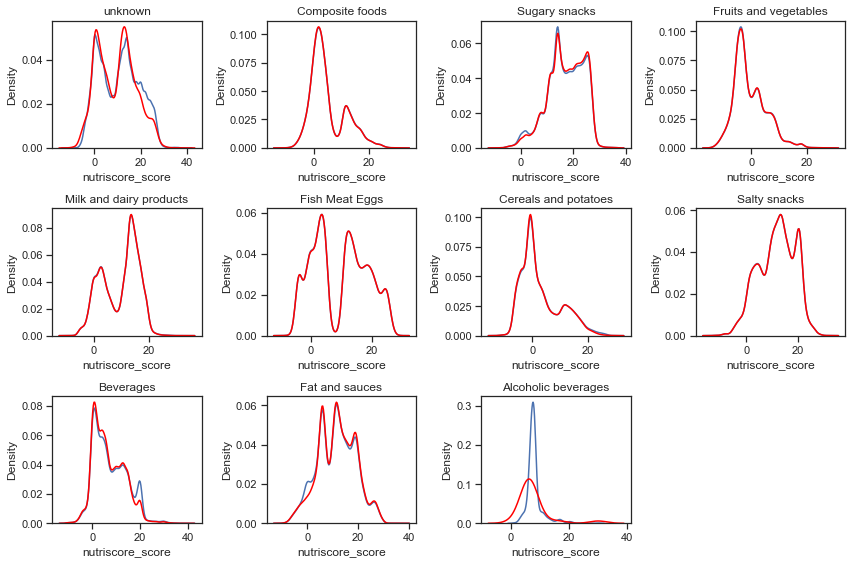

In [148]:
plt.figure()
for i, cat in enumerate(df.loc[:,'pnns_groups_1'].unique()):
    plt.subplot(3, 4, i + 1)
    sns.kdeplot(data = df_final.loc[df_final.loc[:,'pnns_groups_1'] == cat,:], x='nutriscore_score')
    sns.kdeplot(data = df.loc[df.loc[:,'pnns_groups_1'] == cat,:], x='nutriscore_score', color = 'red', alpha = .5)
    plt.tight_layout()
    plt.title(cat)
plt.savefig('KNN_impute_output.png')

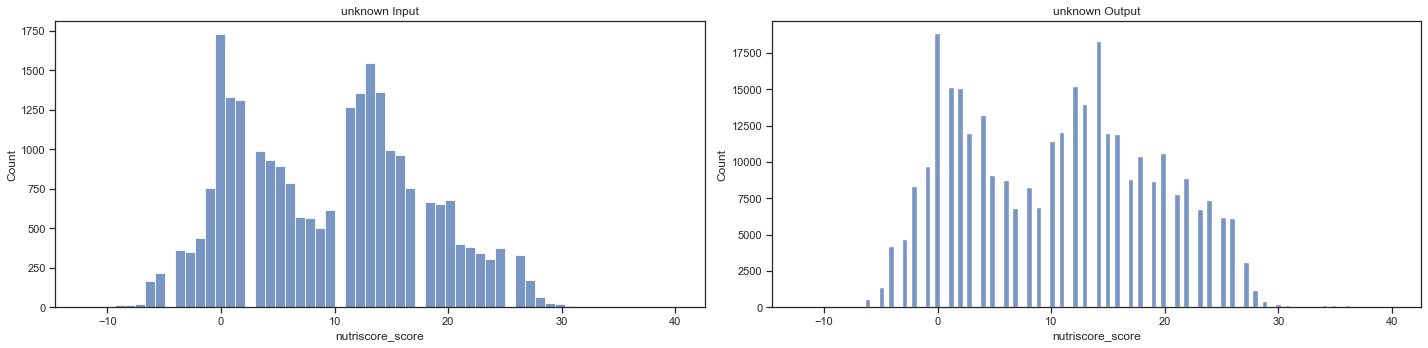

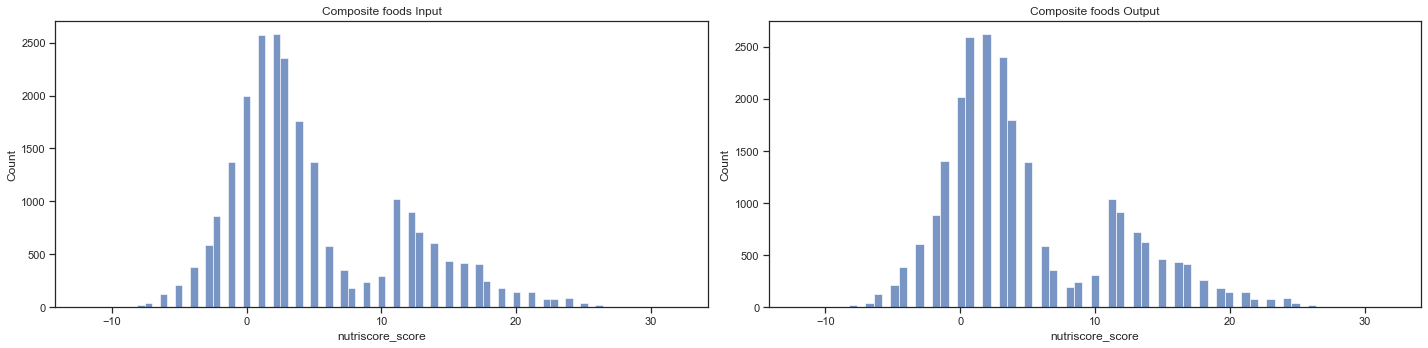

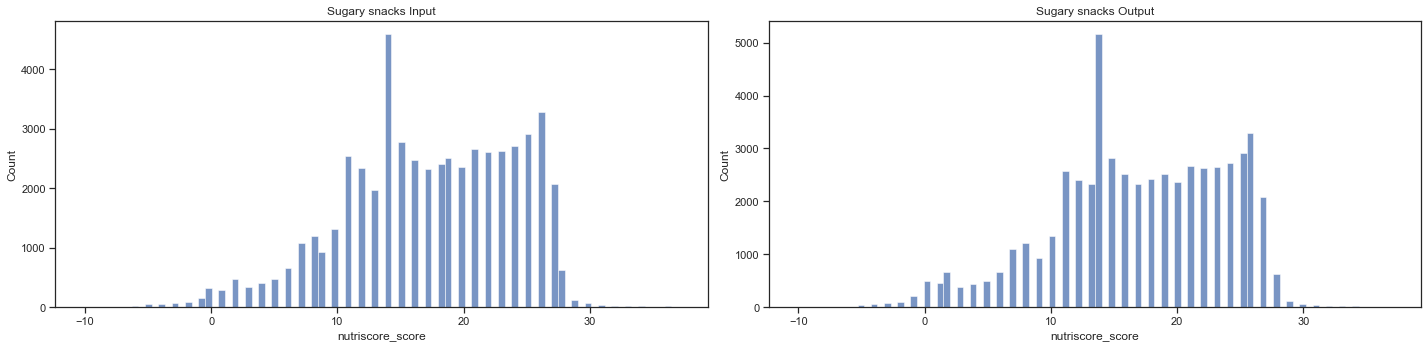

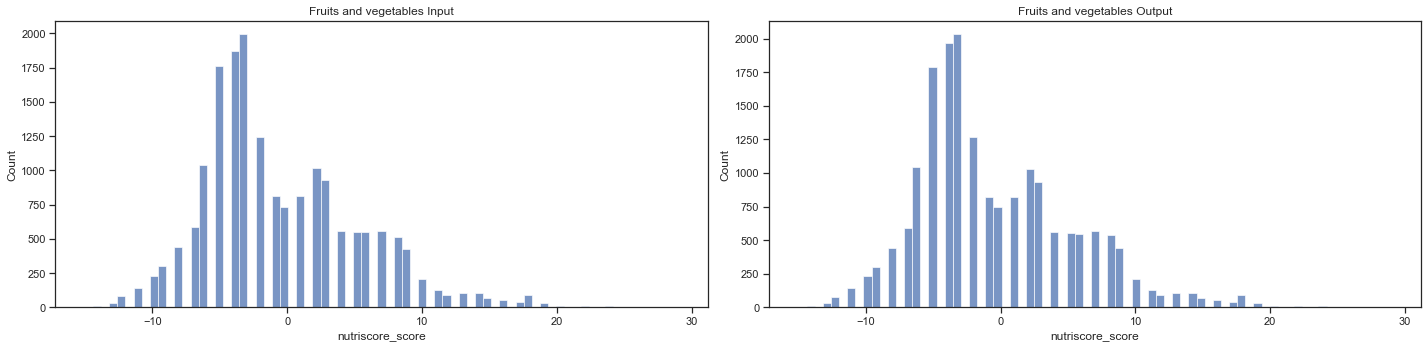

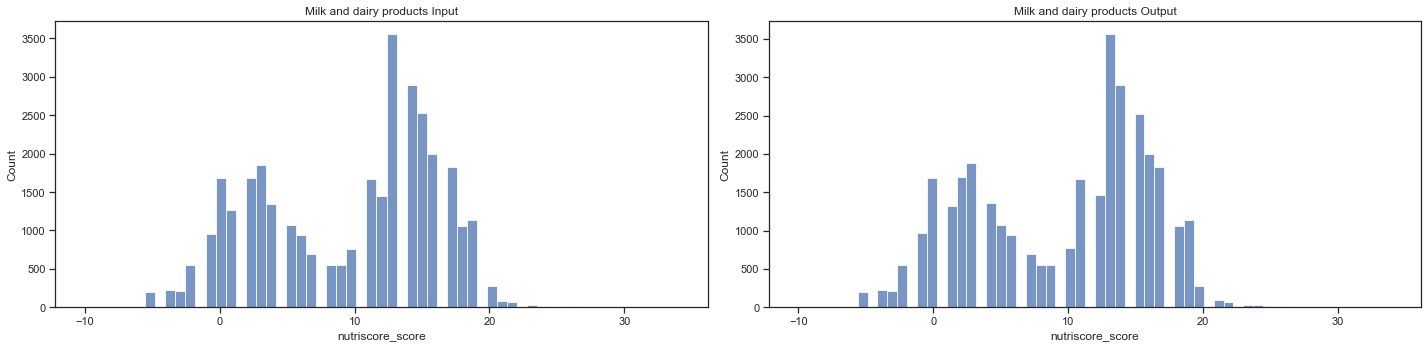

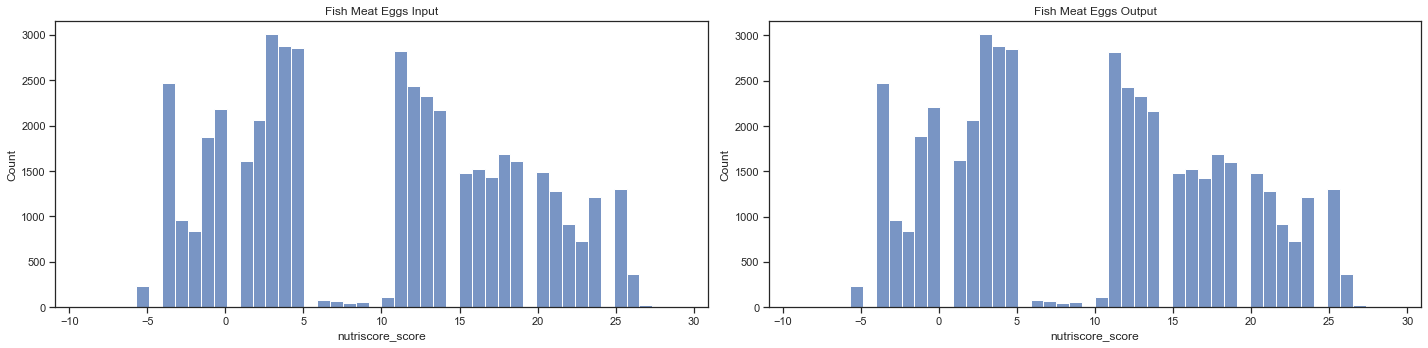

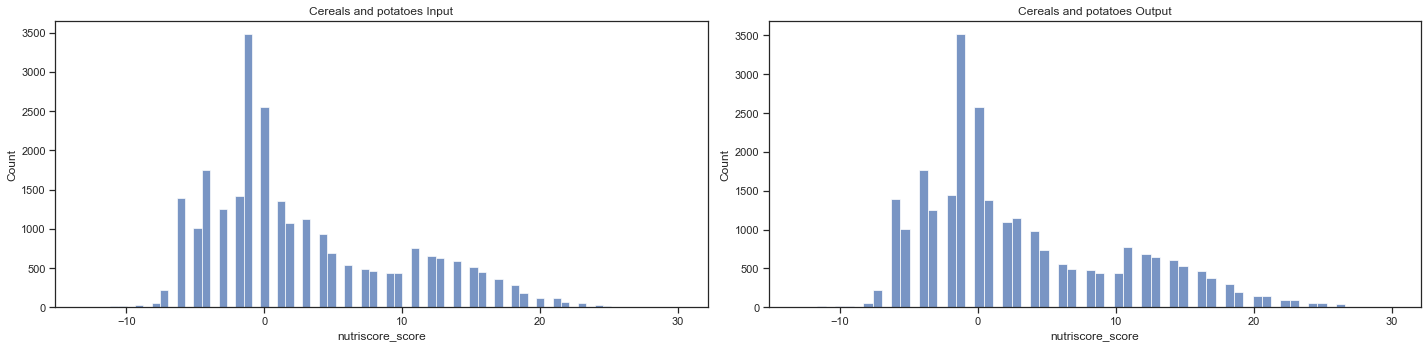

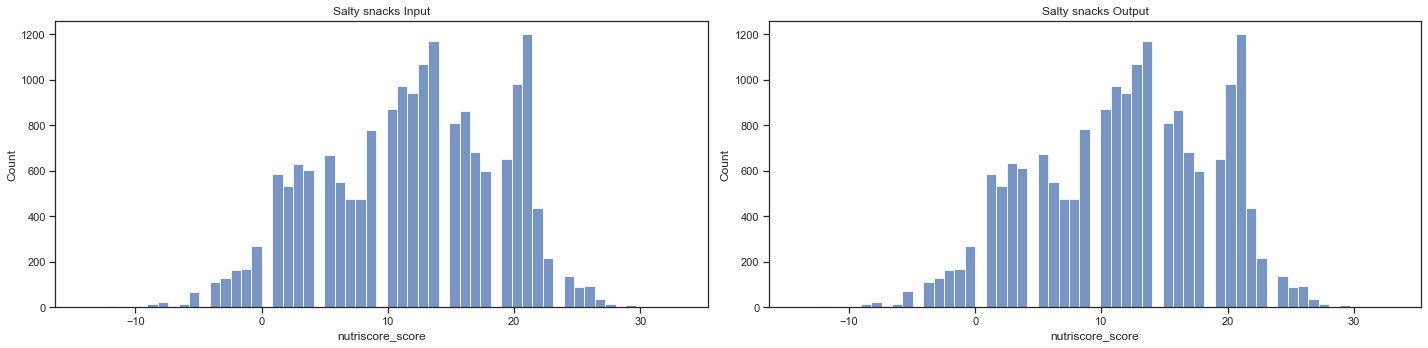

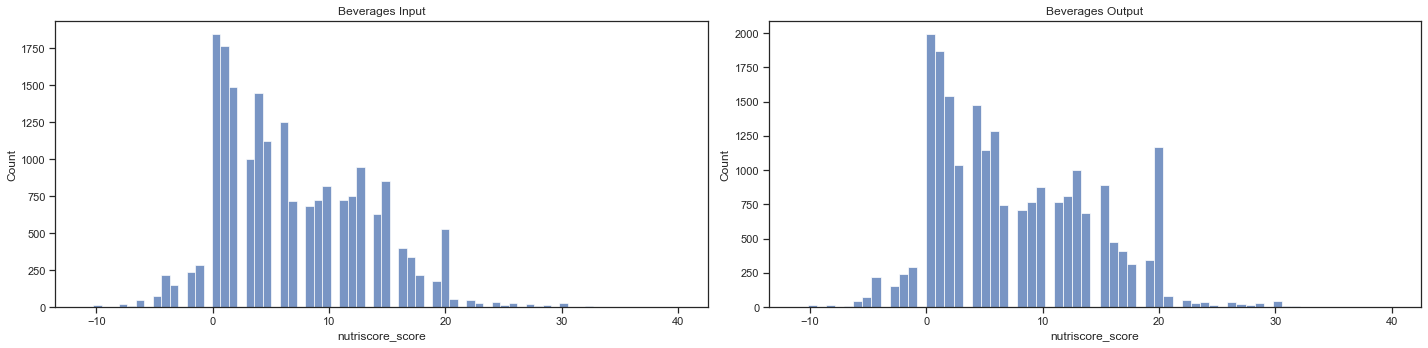

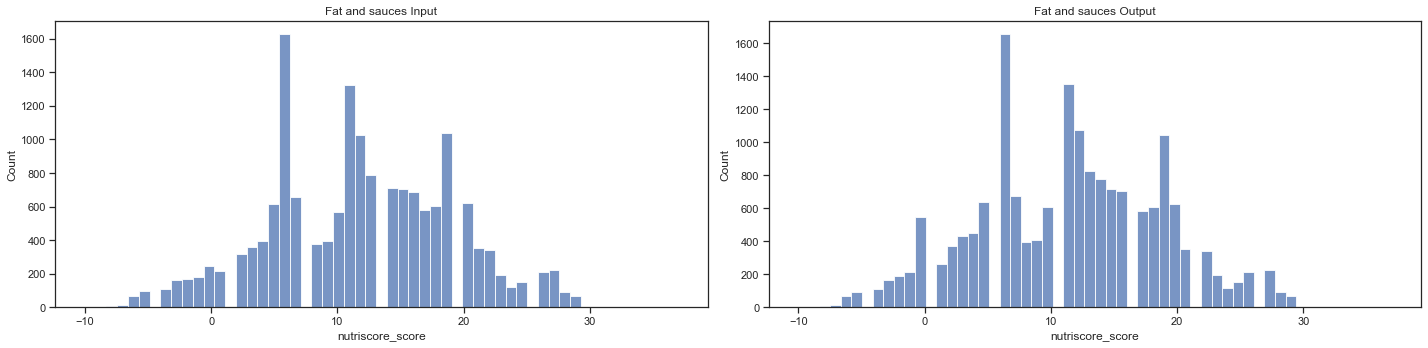

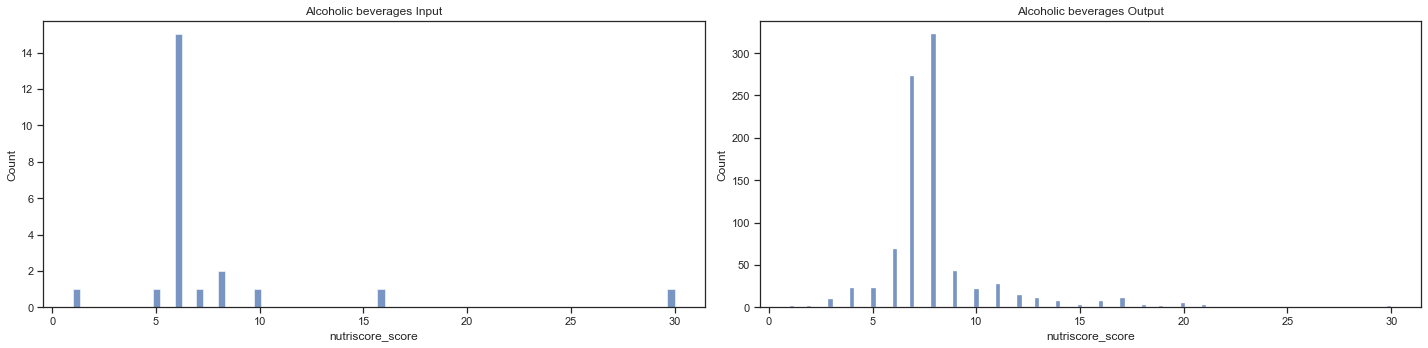

In [149]:
# Visualisation of the imputation effect on data distribution

for cat in df.loc[:,'pnns_groups_1'].unique():
    fig = plt.figure(figsize = (20, 5))

    plt.subplot(1,2,1)
    sns.histplot(x = 'nutriscore_score', data = df.loc[df.loc[:,'pnns_groups_1'] == cat,:])
    plt.title(f'{cat} Input')

    plt.subplot(1,2,2)
    sns.histplot(x = 'nutriscore_score', data = df_final.loc[df_final.loc[:,'pnns_groups_1'] == cat,:])
    plt.title(f'{cat} Output')

    fig.tight_layout()
    plt.show()

# Recommandation algorithme

## Simply using euclidian distance between 2 products

In [112]:
df.loc[df['pnns_groups_2'] == 'Meat'].sample().index.values

array([28193])

In [113]:
index_article = df.loc[df['pnns_groups_2'] == 'Meat'].sample().index[0]
choosen_article = df.iloc[index_article,]
nutri_article = choosen_article.iloc[range(13,20)].values
choosen_article

code                                                           2211110004040
creator                                                              Kiliweb
product_name                                                 Filet de canard
brands                                                               unknown
categories                     Viandes, volailles, canards, filets de canard
countries                                                              En:fr
additives_n                                                              NaN
ingredients_from_palm_oil_n                                              NaN
nutriscore_score                                                         0.0
nutriscore_grade                                                           b
nova_group                                                               NaN
pnns_groups_1                                                 Fish Meat Eggs
pnns_groups_2                                                           Meat

In [114]:
from numpy.linalg import norm

#a = range(0,len(df))
#b = [x for i,x in enumerate(a) if i!=index_article] 

accepted_food = df['pnns_groups_1'].unique()[(df['pnns_groups_1'].unique() != ['Fish Meat Eggs']) & (df['pnns_groups_1'].unique() != ['unknown']) & (df['pnns_groups_1'].unique() != ['Composite foods'])]

df_select = df.loc[df['pnns_groups_1'].isin(accepted_food),]

def euclidian_dist(x):
    score = norm(nutri_article - x.iloc[range(13,20)].values)
    return score

df_select['euclidian_dist'] = df_select.apply(euclidian_dist, axis = 1)

<ipython-input-114-6c486b491c14>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['euclidian_dist'] = df_select.apply(euclidian_dist, axis = 1)


In [116]:
best_match = pd.DataFrame()
for grade in df_select['nutriscore_grade'].dropna().unique():
    best_match = best_match.append(df_select.loc[(df_select['euclidian_dist'] == df_select['euclidian_dist'].min()) & (df_select['nutriscore_grade'] == grade),:])
    best_match

In [117]:
best_match

,code,creator,product_name,brands,categories,countries,additives_n,ingredients_from_palm_oil_n,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,created_years,last_modified_years,euclidian_dist
533061,8410060401402,Date-limite-app,Tapas al minuto mini brochettes de porc au curry,Espuña,"Snacks, snacks salés, tapas",France,4.0,0.0,14.0,d,4.0,Salty snacks,Appetizers,193.0,13.0,4.5,1.0,1.0,18.0,2.0,2015,2020,2.507768
